## K-means clustering of the **Iris** data

In this example, we consider a famous **Iris** dataset, which is an exmaple of a _multivariate data set_ used and made famous by the British statistician and biologist _**Ronald Fisher**_ in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis". See [Wikipedia page](https://en.wikipedia.org/wiki/Iris_flower_data_set) for more details.

Let's start by importing necessary packages.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

First, let's load the data and look at its structure.

In [64]:
# Load the iris dataset
iris = datasets.load_iris()
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [65]:
iris_features = iris.feature_names
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [66]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [67]:
iris_names = iris.target_names
iris_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

As we can see, each item in the dataset has four features and a label (that corresponds to the type of a specie).

Let's visualize the data with a scatter plot by using only two features.

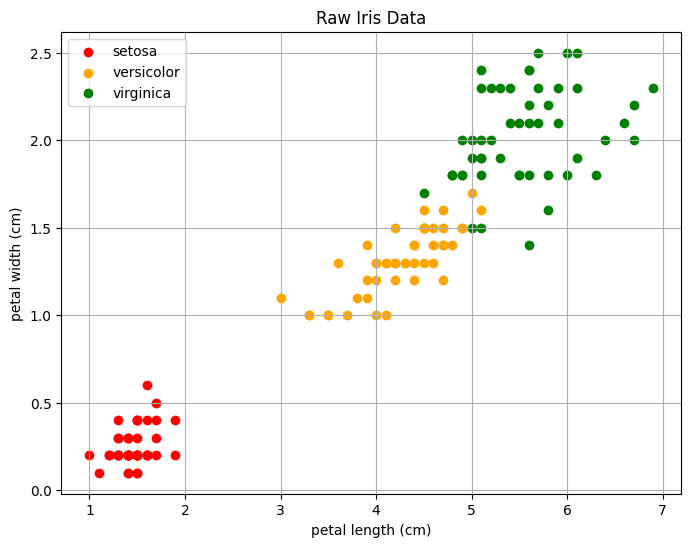

In [68]:
# selecting two features for each item in the dataset for easy visualization
# we only take the petal measurements 
X = iris.data[:, [2, 3]]  

# setting colors corresponding to the species names
colors = ['red', 'orange', 'green']

# step 1: visualize raw data
plt.figure(figsize = (8, 6))
plt.grid()
for i, name in enumerate(iris_names):
    plt.scatter(
        X[iris.target == i, 0], 
        X[iris.target == i, 1],
        c=colors[i], 
        label=name
    )
    
plt.title('Raw Iris Data')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(loc="upper left")
plt.savefig("figures/lecture01-ex02a.png", dpi = 300)

As we can see, data are clustered, depending on the species' types. We can apply a clustering algorithm to find cluster cenetrs.

Her, we are going to use [_**k-means**_ clustering](https://en.wikipedia.org/wiki/K-means_clustering).

In [69]:
# step 2: k-means clustering
# we have imported a `KMeans` object form the `sklearn.cluster` module --
# let use it to find the clusters' centers: we prespesified number of clusters (3) 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# extracting information from the fit
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

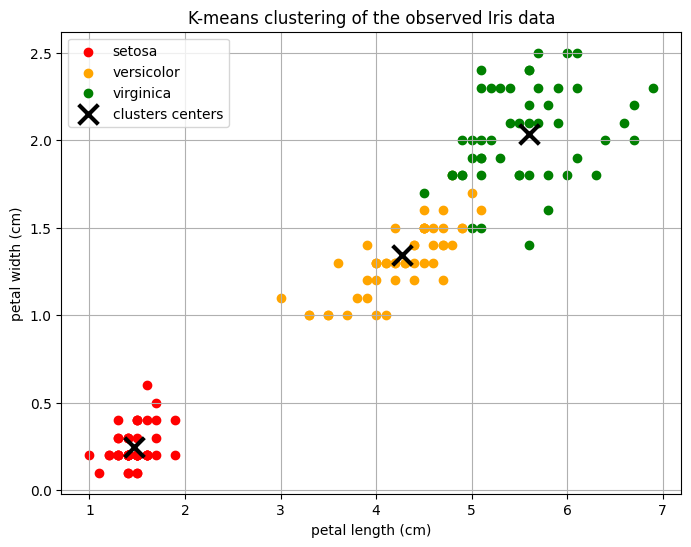

In [70]:
# step 3: visualizing the data with detected clusters
plt.figure(figsize = (8, 6))
plt.grid()
for i, name in enumerate(iris_names):
    plt.scatter(
        X[iris.target == i, 0], 
        X[iris.target == i, 1],
        c=colors[i], 
        label=name
    )
# adding clusters' centers
plt.scatter(
    cluster_centers[:, 0], 
    cluster_centers[:, 1],
    marker='x', 
    s=200, 
    linewidths=3, 
    color='black', 
    zorder=10,
    label = "clusters centers"
)
plt.legend(loc="upper left")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('K-means clustering of the observed Iris data')
plt.savefig("figures/lecture01-ex02b.png", dpi = 300)